In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [26]:
raw_data = pd.read_csv("../data/sleep_data.csv")

In [27]:
raw_data

,Data,Dia da semana,Pontuação,Início,Fim,Duração,Regularidade,Sono profundo,REM,Tempo acordado,Vezes acordado
0,01/05,quinta-feira,72,22:39,06:43,07:58,90,00:39,01:42,6,3
1,02/05,sexta-feira,93,22:32,06:22,07:44,90,01:20,01:10,6,1
2,03/05,sábado,80,22:19,07:30,08:59,90,01:23,01:36,12,4
3,04/05,domingo,77,22:17,07:21,08:35,95,01:12,01:45,29,4
4,05/05,segunda-feira,85,22:08,05:31,07:08,89,01:12,01:38,15,2
...,...,...,...,...,...,...,...,...,...,...,...
68,08/07,terça-feira,78,22:33,07:20,08:39,71,01:03,01:58,8,3
69,09/07,quarta-feira,82,22:29,06:59,08:25,75,01:13,01:14,5,3
70,10/07,quinta-feira,76,00:34,08:30,07:52,74,00:58,01:30,4,2
71,11/07,sexta-feira,85,22:52,07:04,08:03,77,01:16,01:38,9,2


In [28]:
raw_data["Sono profundo"] = raw_data["Sono profundo"].apply(lambda x: int(x.split(":")[0]) * 60 + int(x.split(":")[1]))
raw_data["REM"] = raw_data["REM"].apply(lambda x: int(x.split(":")[0]) * 60 + int(x.split(":")[1]))
raw_data["Duração (min)"] = raw_data["Duração"].apply(lambda x: int(x.split(":")[0]) * 60 + int(x.split(":")[1]))
raw_data["%REM"] = raw_data.apply(lambda x: round((x["REM"] / x["Duração (min)"]) * 100, 2), axis=1)
raw_data["%Sono profundo"] = raw_data.apply(lambda x: round((x["Sono profundo"] / x["Duração (min)"]) * 100, 2), axis=1)

In [29]:
raw_data

,Data,Dia da semana,Pontuação,Início,Fim,Duração,Regularidade,Sono profundo,REM,Tempo acordado,Vezes acordado,Duração (min),%REM,%Sono profundo
0,01/05,quinta-feira,72,22:39,06:43,07:58,90,39,102,6,3,478,21.34,8.16
1,02/05,sexta-feira,93,22:32,06:22,07:44,90,80,70,6,1,464,15.09,17.24
2,03/05,sábado,80,22:19,07:30,08:59,90,83,96,12,4,539,17.81,15.40
3,04/05,domingo,77,22:17,07:21,08:35,95,72,105,29,4,515,20.39,13.98
4,05/05,segunda-feira,85,22:08,05:31,07:08,89,72,98,15,2,428,22.90,16.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,08/07,terça-feira,78,22:33,07:20,08:39,71,63,118,8,3,519,22.74,12.14
69,09/07,quarta-feira,82,22:29,06:59,08:25,75,73,74,5,3,505,14.65,14.46
70,10/07,quinta-feira,76,00:34,08:30,07:52,74,58,90,4,2,472,19.07,12.29
71,11/07,sexta-feira,85,22:52,07:04,08:03,77,76,98,9,2,483,20.29,15.73


In [30]:
from datetime import datetime

raw_data["Data"] = pd.to_datetime(
    raw_data["Data"] + f"/{datetime.now().year}", 
    format="%d/%m/%Y"
)

In [31]:
raw_data = raw_data.drop(["Duração"], axis=1)

In [32]:
data = raw_data[["Data", "Dia da semana", "Pontuação", "Início", "Fim", 
                     "Duração (min)", "Regularidade", "Sono profundo", "%Sono profundo",
                     "REM", "%REM", "Tempo acordado", "Vezes acordado"               
]]

In [33]:
data

,Data,Dia da semana,Pontuação,Início,Fim,Duração (min),Regularidade,Sono profundo,%Sono profundo,REM,%REM,Tempo acordado,Vezes acordado
0,2025-05-01,quinta-feira,72,22:39,06:43,478,90,39,8.16,102,21.34,6,3
1,2025-05-02,sexta-feira,93,22:32,06:22,464,90,80,17.24,70,15.09,6,1
2,2025-05-03,sábado,80,22:19,07:30,539,90,83,15.40,96,17.81,12,4
3,2025-05-04,domingo,77,22:17,07:21,515,95,72,13.98,105,20.39,29,4
4,2025-05-05,segunda-feira,85,22:08,05:31,428,89,72,16.82,98,22.90,15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2025-07-08,terça-feira,78,22:33,07:20,519,71,63,12.14,118,22.74,8,3
69,2025-07-09,quarta-feira,82,22:29,06:59,505,75,73,14.46,74,14.65,5,3
70,2025-07-10,quinta-feira,76,00:34,08:30,472,74,58,12.29,90,19.07,4,2
71,2025-07-11,sexta-feira,85,22:52,07:04,483,77,76,15.73,98,20.29,9,2


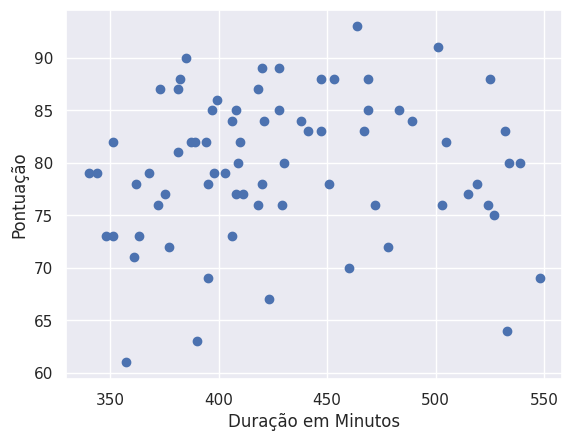

In [34]:
plt.scatter(x=data["Duração (min)"], y=data["Pontuação"])
plt.ylabel("Pontuação")
plt.xlabel("Duração em Minutos")
plt.show()

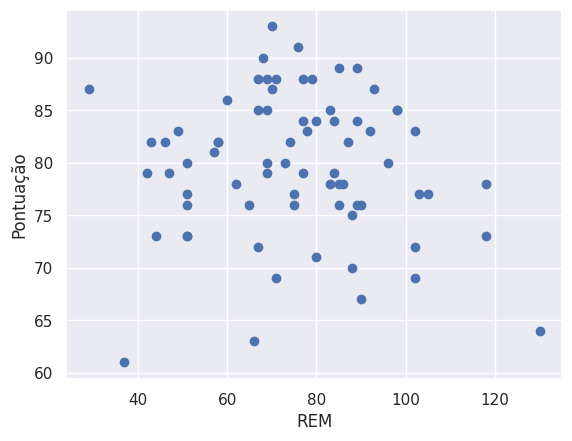

In [35]:
plt.scatter(x=data["REM"], y=data["Pontuação"])
plt.ylabel("Pontuação")
plt.xlabel("REM")
plt.show()

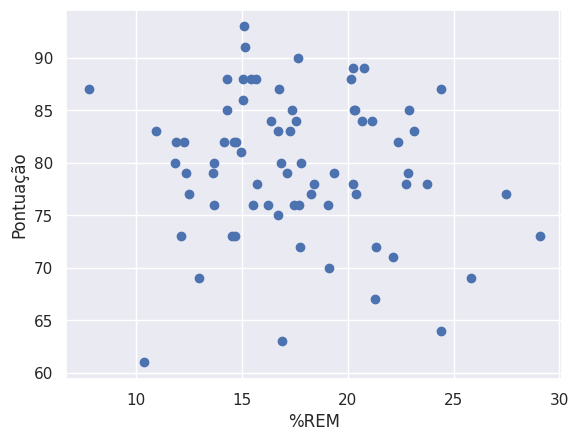

In [36]:
plt.scatter(x=data["%REM"], y=data["Pontuação"])
plt.ylabel("Pontuação")
plt.xlabel("%REM")
plt.show()

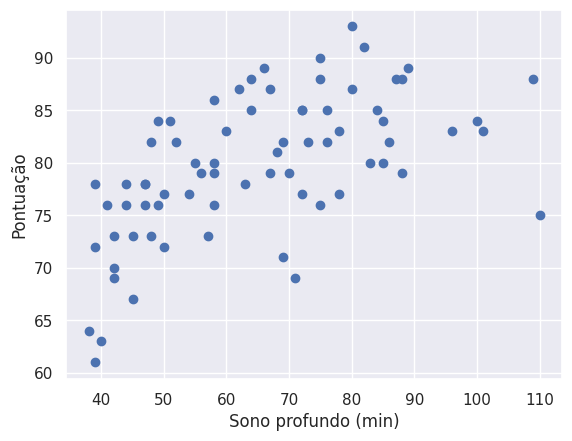

In [38]:
plt.scatter(x=data["Sono profundo"], y=data["Pontuação"])
plt.ylabel("Pontuação")
plt.xlabel("Sono profundo (min)")
plt.show()

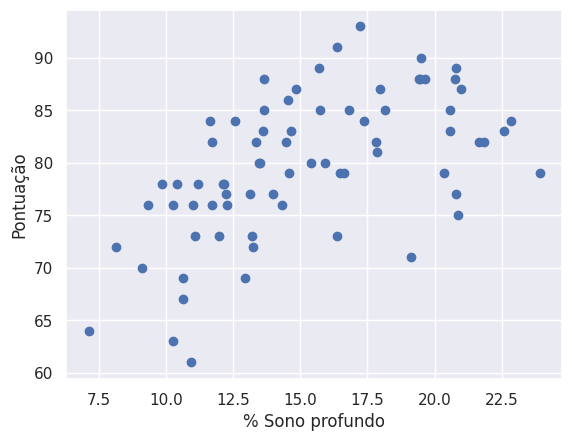

In [39]:
plt.scatter(x=data["%Sono profundo"], y=data["Pontuação"])
plt.ylabel("Pontuação")
plt.xlabel("% Sono profundo")
plt.show()

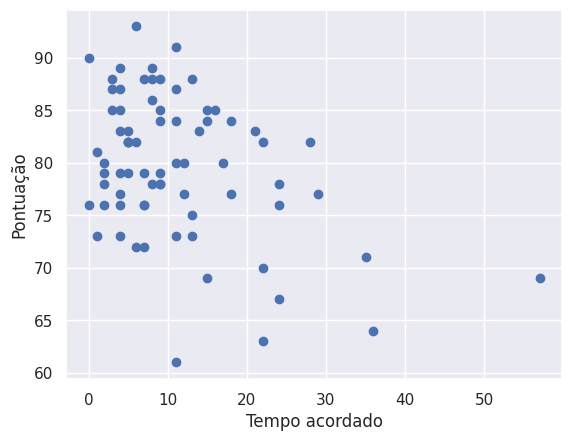

In [40]:
plt.scatter(x=data["Tempo acordado"], y=data["Pontuação"])
plt.ylabel("Pontuação")
plt.xlabel("Tempo acordado")
plt.show()

In [41]:
media_pontuacao = raw_data["Pontuação"].mean()
media_pontuacao

np.float64(79.71232876712328)

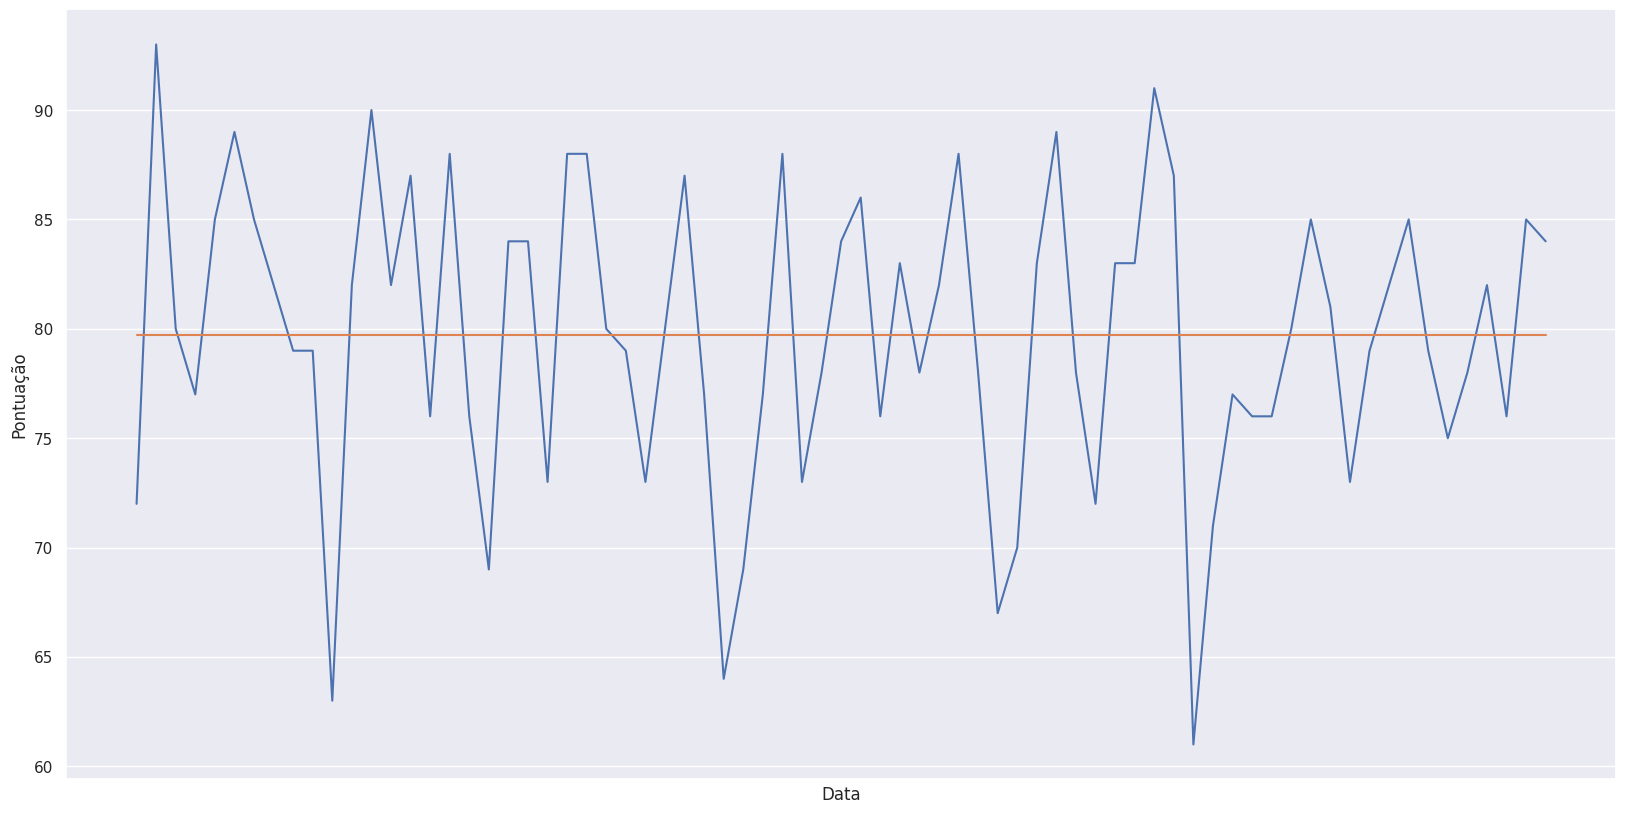

In [47]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=data, x="Data", y="Pontuação")
sns.lineplot(data=data, x="Data", y=media_pontuacao)
plt.xlabel("Data")
plt.xticks([])
plt.show()

In [48]:
metricas = ["Pontuação", "REM", "%REM", "Sono profundo", "%Sono profundo",
            "Tempo acordado", "Vezes acordado", "Duração (min)"]

<Axes: >

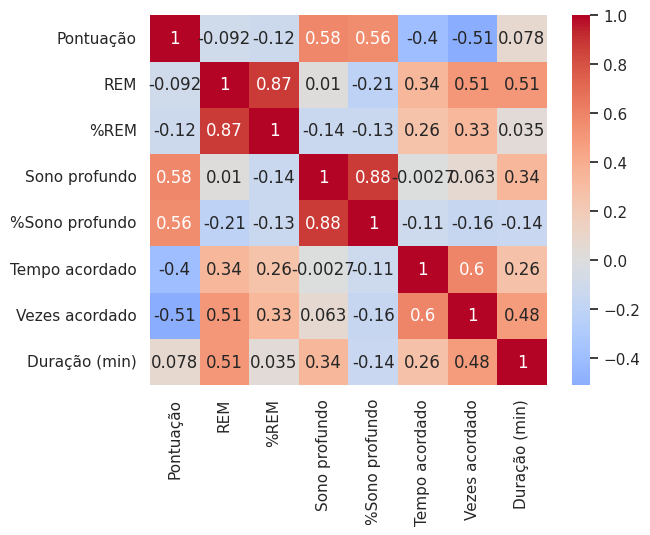

In [52]:
sns.heatmap(data[metricas].corr(),  annot=True, cmap="coolwarm", center=0)